# DX 601 Week 3 Homework

## Introduction

In this homework, you will practice plotting data and calculating model predictions and losses.

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for sample code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Instructions

You should replace every instance of "..." below.
These are where you are expected to write code to answer each problem.

After some of the problems, there are extra code cells that will test functions that you wrote so you can quickly see how they run on an example.
If your code works on these examples, it is more likely to be correct.
However, the autograder will test different examples, so working correctly on these examples does not guarantee full credit for the problem.
You may change the example inputs to further test your functions on your own.
You may also add your own example inputs for problems where we did not provide any.

Be sure to run each code block after you edit it to make sure it runs as expected.
When you are done, we strongly recommend you run all the code from scratch (Runtime menu -> Restart and Run all) to make sure your current code works for all problems.

If your code raises an exception when run from scratch, it will  interfere with the auto-grader process causing you to lose some or all points for this homework.
Please ask for help in YellowDig or schedule an appointment with a learning facilitator if you get stuck.


## Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [51]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

### Problem 1

The code below loads a small mango data set into the variable `mango_data`.
The variable `mango_data` is a pandas dataframe which lets you easily access data one row at a time or one column at a time.


In [52]:
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

In [53]:
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


Given a dataframe, you can select a column by indexing it with the name of the column.
The indexing operation uses square brackets and the name of the column goes between them.
Here is an example selecting the "softness" column of the mango data.

In [54]:
mango_data["softness"]

0    4
1    5
2    3
3    2
4    1
5    1
6    1
7    2
Name: softness, dtype: int64

Most Python operations and functions that work with sequences such as lists also work with Pandas dataframe columns.
For example, you can compute the sum of a dataframe column using the `sum` function.

In [55]:
sum(mango_data["softness"])

19

Set `p1` to the average of the estimated sweetness column in the small mango data set.

In [56]:
# YOUR CHANGES HERE

p1 = np.mean(mango_data["estimated_sweetness"])

Check the value of `p1`.

In [57]:
p1

np.float64(2.25)

### Problem 2

Write a function `p2` that takes in an input number `x` and returns $3 x + 1$.

(You can make any specific linear function this way, but it may only work on simpler input formats.)

In [58]:
# YOUR CHANGES HERE

def p2(x):
    return 3*x +1


### Problem 3

Plot the small mango data set using the estimated sweetness as the x axis and the rated flavor as the y axis.

To do this, edit the line below that says
```
#p3 = plt.scatter(..., ...)
```
The first ellipsis should be replaced with the x data, and the second ellipsis should be replaced with the y data.
After you do this, uncomment the line by removing the `#` character at the beginning.
Make sure not to leave any extra spaces there.

Text(0.5, 1.0, 'Rated Flavor vs Estimated Sweetness')

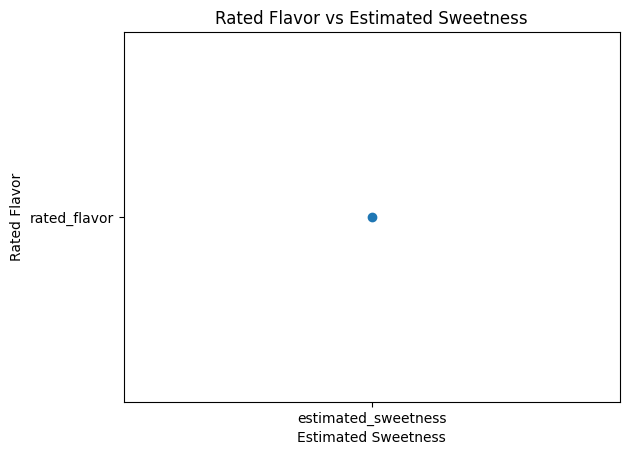

In [59]:
# YOUR CHANGES HERE

# uncomment the following line after filling in the data to be plotted.
p3 = plt.scatter(['estimated_sweetness'], ['rated_flavor'])

plt.xlabel("Estimated Sweetness")
plt.ylabel("Rated Flavor")
plt.title("Rated Flavor vs Estimated Sweetness")

### Problem 4

The function `f4` implements a very simple linear function.
`f4` takes in a dataframe and returns the "estimated_sweetness" column as its output.
So $f_4(x) = 1.0 (\mathrm{estimated~sweetness})$.

In [103]:
def f4(df):
    # the rename here is not strictly necessary, but makes the output more clear below.
    # without the rename, the column below would be called estimated_sweetness.
    return df["estimated_sweetness"]

In [104]:
f4(mango_data)

0    4
1    5
2    3
3    1
4    1
5    1
6    1
7    2
Name: estimated_sweetness, dtype: int64

Set `p4` to be the residuals from using `f4` as a model predicting the rated flavor column.
The result should be a sequence of residuals, not a single number.

A Python list, NumPy array, or pandas are all acceptable output types.
Whatever output type you use, the order of outputs should match the order of rows in the mango data set.

In [105]:
# YOUR CHANGES HERE

p4 =mango_data['rated_flavor'] - f4(mango_data)

Check the values in `p4`.

In [106]:
p4

0    1
1   -4
2    0
3    1
4    0
5    0
6    0
7    0
dtype: int64

### Problem 5

The function `f5` is another linear function computing $f_5(x) = 0.8 (\mathrm{yellow~rating}) + 0.2 (\mathrm{softness})$.


In [64]:
def f5(df):
    return 0.8 * df["yellow_rating"] + 0.2 * df["softness"]

In [65]:
f5(mango_data)

0    4.8
1    5.0
2    3.8
3    2.8
4    1.0
5    1.8
6    1.0
7    2.8
dtype: float64

Set `p5` to be the $L_1$ loss of each row of data after using `f5` to predict the rated flavor column.
The result should be a sequence of losses, not a single number.

A Python list, NumPy array, or pandas are all acceptable output types.
Whatever output type you use, the order of outputs should match the order of rows in the mango data set.

In [107]:
# YOUR CHANGES HERE

p5 =  mango_data['rated_flavor'] - f5(mango_data) 

Check the values in `p5`.

In [108]:
p5

0    0.2
1   -4.0
2   -0.8
3   -0.8
4    0.0
5   -0.8
6    0.0
7   -0.8
dtype: float64

### Problem 6

The function `f6` is a linear function computing $f_6(x) = 1.2 (\mathrm{yellow~rating}) - 0.1 (\mathrm{green~rating}) - 0.1 (\mathrm{wrinkles})$.

In [68]:
def f6(df):
    return 1.2 * df["yellow_rating"] - 0.1 * df["green_rating"] - 0.1 * df["wrinkles"]

In [69]:
f6(mango_data)

0    5.9
1    5.8
2    4.5
3    3.3
4    0.6
5    1.9
6    0.6
7    3.2
dtype: float64

Set `p6` to be the average $L_2$ loss using `f6` to predict the rated flavor column.

**Note that the average $L_2$ loss was requested.**
Some of the videos this week calculated the sum of $L_2$ losses instead.

In [70]:
# YOUR CHANGES HERE

p6 = np.mean((f6(mango_data) - mango_data['rated_flavor'])**2)

Check the value of `p6`.

In [71]:
p6

np.float64(3.795000000000001)

### Problem 7

Write a function `p7` taking in a dataframe like the mangos data, and returning the "estimated_flavor" column as its predictions.
(This should be similar to the predictions in Problem 3.)

In [72]:
# YOUR CHANGES HERE

def p7(df):
    return df['estimated_flavor'].rename('prediction')

Check the output of p7 on the mango data set.

In [73]:
p7(mango_data)

0    4
1    5
2    3
3    2
4    1
5    1
6    2
7    2
Name: prediction, dtype: int64

### Problem 8

Set `p8` to be the average $L_2$ loss using the "yellow_rating" column to predict the "rated_flavor" column as in Problem 3.

In [74]:
# YOUR CHANGES HERE

p8 = np.mean((mango_data['yellow_rating'] - mango_data['rated_flavor'])**2)

Check the value of `p8`.

In [75]:
p8

np.float64(2.5)

### Problem 9

Write a function `p9` taking in a dataframe returning the results of $0.5 (\mathrm{yellow~rating}) + 0.4 (\mathrm{estimated~flavor})$.

In [76]:
# YOUR CHANGES HERE

def p9(df):
    return 0.5*df['yellow_rating']+ 0.4*df['estimated_flavor']

Check the output of `p9` with the mango data set.

In [77]:
p9(mango_data)

0    4.1
1    4.5
2    3.2
3    2.3
4    0.9
5    1.4
6    1.3
7    2.3
dtype: float64

### Problem 10

Set `p10` to be the average $L_1$ loss using the prediction $0.3 (\mathrm{yellow~rating}) + 0.1(\mathrm{softness}) + 0.4(\mathrm{estimated~sweetness})$ for the mango data set's rated flavor column.

In [109]:
# YOUR CHANGES HERE

p10 = np.mean(abs( mango_data['rated_flavor']- 0.3* mango_data['yellow_rating'] + 0.1*mango_data['softness']+0.4* mango_data['estimated_sweetness']))

Check the value of `p10`.

In [110]:
p10

np.float64(2.2375)

### Problem 11

Build a linear regression for the mango rated flavor column using just the estimated flavor column.
Set `p11` to the prediction of this model when the estimated flavor value is 3.

In [80]:
# YOUR CHANGES HERE

from sklearn.linear_model import LinearRegression
X_mango = mango_data[['estimated_flavor']]
Y_mango= mango_data['rated_flavor']
model_mango= LinearRegression()
model_mango.fit(X_mango, Y_mango)
p11 = model_mango.predict([[3]])[0]

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Check the value of `p11`.

In [81]:
p11

np.float64(2.2142857142857144)

### Problem 12

Build a linear regression for the mango rated flavor column using just the yellow rating column.
Set `p12` to the additive constant in the linear equation.

You can look at the videos or code examples to see how to get the additive constant depending how you built the model, or evaluate your model with all zero inputs.

In [82]:
# YOUR CHANGES HERE

X_mango_2=mango_data[['yellow_rating']]
Y_mango_2=mango_data['rated_flavor']
model_mango.fit(X_mango_2, Y_mango_2)
p12 = model_mango.intercept_

Check the value of `p12`.

In [83]:
p12

np.float64(0.33333333333333304)

### Problem 13

Build a linear regression for the mango rated flavor column using just the yellow rating column.
(You can reuse the regression built for problem 12.)
Set `p13` to the coefficient of the yellow rating value in the linear equation.

You can look at the videos or code examples to see how to get coefficient, or you may be able to deduce it with a couple evaluations of the model (e.g. $f(1) - f(0)$).

In [111]:
# YOUR CHANGES HERE

p13 = model_mango.coef_[0]

Check the value of `p13`.

In [112]:
p13

np.float64(-0.6000000000000003)

### Problem 14

Set `p14` to be the sample variance of the rated flavors in the mango data set.

In [86]:
# YOUR CHANGES HERE

p14 = np.var(mango_data['rated_flavor'], ddof=1)

Check the value of `p14`.

In [87]:
p14

np.float64(2.0)

### Problem 15

Set `p15` to be the means of each column of the mango data set.
Your output should be a sequence of the means in the same order as the columns of the mango data set.

You can calculate this however you like with just Python, NumPy's [numpy.mean](), or pandas' [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) method.
We suggest trying the pandas method for your own convenience.


In [88]:
# YOUR CHANGES HERE

p15 = pd.DataFrame.mean(mango_data)

Check the values in `p15`.

In [89]:
p15

green_rating           3.000
yellow_rating          3.000
softness               2.375
wrinkles               0.750
estimated_flavor       2.500
estimated_sweetness    2.250
rated_flavor           2.000
dtype: float64

### Problem 16

Given the following three functions,

* $f_a(x) = 1.0 (\mathrm{yellow~rating})$
* $f_b(x) = 0.4 (\mathrm{yellow~rating}) + 0.6 (\mathrm{estimated~sweetness})$
* $f_c(x) = 0.4 (\mathrm{yellow~rating}) + 0.2 (\mathrm{softness}) + 0.3 (\mathrm{estimated~sweetness})$

set `p16` to `"a"`, `"b"`, or `"c"` to indicate which one has the lowest $L_1$ loss predicting the rated flavor column.


In [116]:
# YOUR CHANGES HERE

np.sum(abs(mango_data['rated_flavor']- 1.0*mango_data['yellow_rating']))
#np.sum(abs(mango_data['rated_flavor']-0.4*mango_data['yellow_rating']+0.6*mango_data['estimated_sweetness']))
#np.sum(abs(mango_data['rated_flavor']- 0.4*mango_data['yellow_rating']+0.2*mango_data['softness']+0.3*mango_data['estimated_sweetness']))

np.float64(8.0)

### Problem 17

Load the data file "f17.tsv" and set `p17` to be a sequence of the means of each column.

In [91]:
# YOUR CHANGES HERE

df=pd.read_csv("f17.tsv", sep='\t')
p17=pd.DataFrame.mean(df)
p17

a    0.507912
b    0.475160
c    0.434010
d    0.504815
e    0.516061
f    0.496363
dtype: float64

### Problem 18

Set `p18` to be the $R^2$ value of the function `f18` predicting the rated flavor for the mango data set.

In [92]:
def f18(df):
    return 0.7 * df["estimated_flavor"]

In [123]:
# YOUR CHANGES HERE

p18= 1-(np.sum((mango_data['rated_flavor']-f18(mango_data))**2)/np.sum((mango_data['rated_flavor']-np.mean(mango_data['rated_flavor']))**2))
p18

np.float64(0.07428571428571418)

### Problem 19

Set `p19` to be the average $L_2$ loss of using `f19` to predict the rated flavor of the mango data set.

`f19` is not linear, but this should not affect your loss calculation.

In [94]:
def f19(df):
    return (df["yellow_rating"] ** 2) / 10 + df["estimated_sweetness"] * 0.5

In [95]:
# YOUR CHANGES HERE

p19= sum(f19(mango_data)-mango_data['rated_flavor'])**2


Check the value of `p19`.

In [96]:
p19

4.0

### Problem 20

Build a linear regression for the mango rated flavor column using all the other columns as inputs.
Set `p20` to the column with the highest positive coefficient.
(`p20` should be a string with the name of the column.)

In [97]:
mango_inputs = mango_data.drop("rated_flavor", axis=1)
mango_inputs

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness
0,1,5,4,0,4,4
1,1,5,5,1,5,5
2,2,4,3,1,3,3
3,3,3,2,0,2,1
4,5,1,1,1,1,1
5,4,2,1,1,1,1
6,5,1,1,1,2,1
7,3,3,2,1,2,2


In [98]:
# YOUR CHANGES HERE
mango_outputs= mango_data['rated_flavor']
model_mango.fit(mango_inputs, mango_outputs)
coefs= pd.Series(model_mango.coef_, index=mango_inputs.columns)
p20 = coefs[coefs>0].idxmax()

Check the value of `p20`.

In [99]:
p20

'estimated_sweetness'

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE
I needed AI to help me solving  all of P20 the problem.